# 🔍 Pattern Analysis & Bottleneck Identification

This notebook demonstrates pattern recognition and bottleneck identification in traffic data.

## Contents
1. Peak Hour Analysis
2. Seasonal Patterns
3. State Comparison
4. Bottleneck Identification
5. Day vs Night Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, '..')

from src.analysis.patterns import PatternRecognizer
from src.analysis.bottlenecks import BottleneckIdentifier
from src.analysis.time_series import TimeSeriesAnalyzer

print('✅ Modules loaded!')

✅ Modules loaded!


In [2]:
# Initialize analyzers
pattern_analyzer = PatternRecognizer()
pattern_analyzer.load_processed_data(
    time_file='../data/processed/accidents_time_processed.csv',
    month_file='../data/processed/accidents_month_processed.csv'
)

bottleneck_analyzer = BottleneckIdentifier()
bottleneck_analyzer.load_processed_data(
    severity_file='../data/processed/accidents_severity_processed.csv',
    vehicle_file='../data/processed/vehicle_registrations_processed.csv',
    time_file='../data/processed/accidents_time_processed.csv'
)

ts_analyzer = TimeSeriesAnalyzer()
ts_analyzer.load_processed_data(
    month_file='../data/processed/accidents_month_processed.csv',
    time_file='../data/processed/accidents_time_processed.csv'
)

print('✅ Analyzers initialized!')

✅ Analyzers initialized!


## 1. Peak Hour Analysis

In [3]:
# Analyze peak hours nationally
peak_hours = pattern_analyzer.analyze_peak_hours()
print('🕐 PEAK HOUR ANALYSIS (National)')
print('='*60)
peak_hours

🕐 PEAK HOUR ANALYSIS (National)


,TimeSlot,TotalAccidents,MeanAccidents,StdAccidents,Percentage,Classification,Rank
6,18:00-21:00,312044,3355.311828,13944.672924,20.37,PEAK,1
5,15:00-18:00,263384,2832.086022,11632.536585,17.19,MODERATE,2
4,12:00-15:00,229049,2462.892473,10034.493931,14.95,MODERATE,3
3,09:00-12:00,217494,2338.645161,9476.998322,14.20,MODERATE,4
7,21:00-24:00,178975,1924.462366,7715.856500,11.68,MODERATE,5
2,06:00-09:00,160166,1722.215054,6997.736583,10.46,MODERATE,6
1,03:00-06:00,86122,926.043011,3757.051084,5.62,LOW,7
0,00:00-03:00,84673,910.462366,3609.244075,5.53,LOW,8


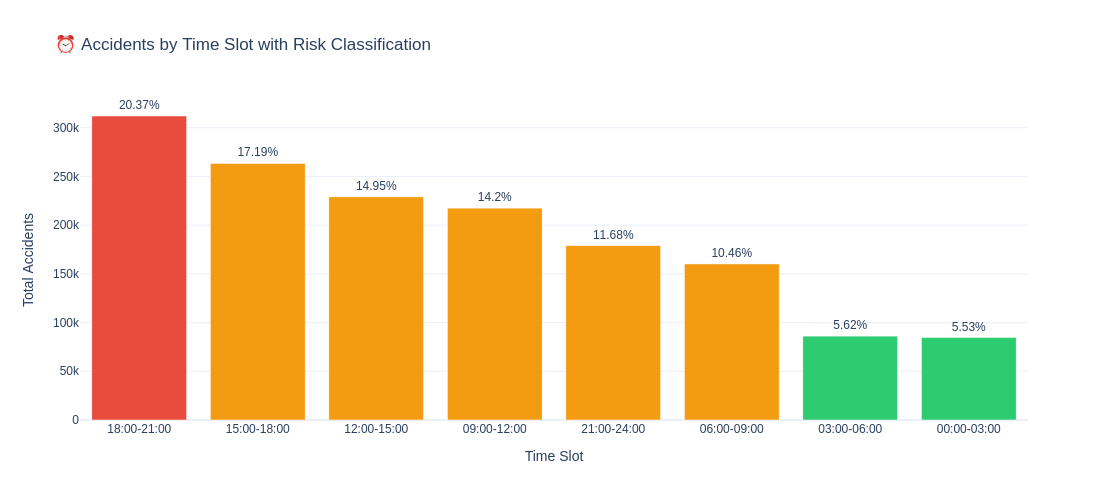

In [4]:
# Visualize peak hours
colors = ['#e74c3c' if c == 'PEAK' else '#f39c12' if c == 'MODERATE' else '#2ecc71' 
          for c in peak_hours['Classification']]

fig = go.Figure(data=[
    go.Bar(x=peak_hours['TimeSlot'], y=peak_hours['TotalAccidents'],
           marker_color=colors, text=peak_hours['Percentage'].astype(str) + '%',
           textposition='outside')
])

fig.update_layout(
    title='⏰ Accidents by Time Slot with Risk Classification',
    xaxis_title='Time Slot',
    yaxis_title='Total Accidents',
    template='plotly_white',
    height=500
)
fig.show()

In [5]:
# Peak hour by state
peak_by_state = pattern_analyzer.get_peak_hour_by_state()
print('🏆 Peak Hour by State (Top 15):')
peak_by_state.head(15)

🏆 Peak Hour by State (Top 15):


,State,PeakTimeSlot,PeakAccidents
310,Total (All India),18:00-21:00,95984
230,Total (States),18:00-21:00,93733
182,Tamil Nadu,18:00-21:00,17159
742,Total (Cities),18:00-21:00,12046
102,Madhya Pradesh,18:00-21:00,10613
94,Kerala,18:00-21:00,9542
86,Karnataka,18:00-21:00,9265
206,Uttar Pradesh,18:00-21:00,6864
110,Maharashtra,18:00-21:00,6368
166,Rajasthan,18:00-21:00,5229


## 2. Seasonal Patterns

In [6]:
# Monthly pattern analysis
monthly = pattern_analyzer.analyze_monthly_patterns()
print('📅 MONTHLY PATTERN ANALYSIS')
print('='*60)
monthly

📅 MONTHLY PATTERN ANALYSIS


,Month,MonthNum,TotalAccidents,MeanAccidents,StdAccidents,Percentage,DeviationFromMean,Classification
4,January,1,136767,1470.612903,6026.526424,8.93,7.13,NORMAL
3,February,2,125228,1346.537634,5497.162674,8.17,-1.90,NORMAL
7,March,3,128406,1380.709677,5635.503455,8.38,0.59,NORMAL
0,April,4,123942,1332.709677,5450.843458,8.09,-2.91,NORMAL
8,May,5,137279,1476.118280,6056.283675,8.96,7.54,NORMAL
6,June,6,128881,1385.817204,5653.716998,8.41,0.96,NORMAL
5,July,7,121498,1306.430108,5299.922878,7.93,-4.83,NORMAL
1,August,8,123803,1331.215054,5394.399035,8.08,-3.02,NORMAL
11,September,9,122171,1313.666667,5315.105724,7.98,-4.30,NORMAL
10,October,10,126977,1365.344086,5531.482391,8.29,-0.53,NORMAL


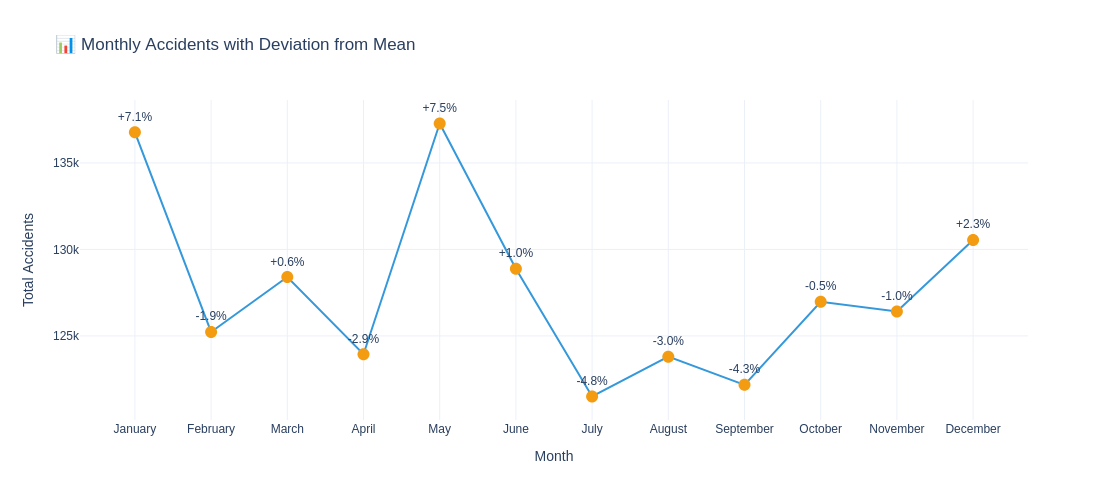

In [7]:
# Visualize monthly patterns
colors = ['#e74c3c' if c == 'HIGH' else '#f39c12' if c == 'NORMAL' else '#2ecc71' 
          for c in monthly['Classification']]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=monthly['Month'], y=monthly['TotalAccidents'],
    mode='lines+markers+text',
    marker=dict(size=12, color=colors),
    line=dict(color='#3498db', width=2),
    text=monthly['DeviationFromMean'].apply(lambda x: f"{x:+.1f}%"),
    textposition='top center'
))

fig.update_layout(
    title='📊 Monthly Accidents with Deviation from Mean',
    xaxis_title='Month',
    yaxis_title='Total Accidents',
    template='plotly_white',
    height=500
)
fig.show()

In [8]:
# Seasonality detection
seasonality = ts_analyzer.detect_seasonality()
print('🌡️ SEASONALITY DETECTION')
print('='*60)
for key, value in seasonality.items():
    print(f'{key}: {value}')

🌡️ SEASONALITY DETECTION
has_seasonality: False
amplitude: 12.36
peak_months: ['January', 'May']
trough_months: ['July', 'September']
max_month: May
min_month: July
coefficient_of_variation: 4.03


## 3. State Comparison

In [9]:
# State comparison
state_comparison = pattern_analyzer.get_state_comparison()
state_comparison = state_comparison[~state_comparison['State'].str.contains('Total', case=False, na=False)]
print('🗺️ STATE COMPARISON (Top 15)')
print('='*60)
state_comparison.head(15)

🗺️ STATE COMPARISON (Top 15)


,State,TotalAccidents,MeanAccidents,StdAccidents,NationalShare,Rank
75,Tamil Nadu,67213,8401.625,4934.899679,4.39,4
50,Madhya Pradesh,54763,6845.375,3087.924312,3.57,5
40,Kerala,45981,5747.625,3274.405941,3.00,6
39,Karnataka,43439,5429.875,2454.257609,2.84,7
85,Uttar Pradesh,37764,4720.500,1056.787180,2.47,8
52,Maharashtra,31347,3918.375,1490.695613,2.05,9
69,Rajasthan,24861,3107.625,1547.476465,1.62,10
76,Telangana,22903,2862.875,1165.840033,1.50,11
4,Andhra Pradesh,19949,2493.625,1105.601057,1.30,12
25,Gujarat,16349,2043.625,942.977948,1.07,13


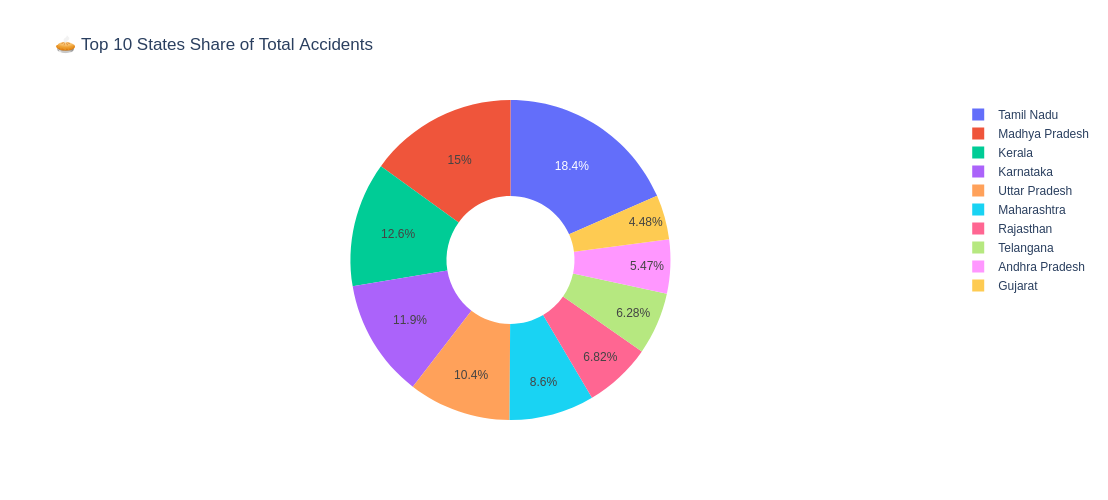

In [10]:
# Top 10 states pie chart
top10 = state_comparison.head(10)

fig = px.pie(top10, values='TotalAccidents', names='State', 
             title='🥧 Top 10 States Share of Total Accidents',
             hole=0.4)
fig.update_layout(template='plotly_white', height=500)
fig.show()

## 4. Bottleneck Identification

In [11]:
# Severity hotspots
severity_hotspots = bottleneck_analyzer.analyze_severity_hotspots()
severity_hotspots = severity_hotspots[~severity_hotspots['State'].str.contains('Total', case=False, na=False)]
print('🔥 SEVERITY HOTSPOTS (Top 15)')
print('='*60)
severity_hotspots.head(15)[['State', 'Cases', 'FatalityRate', 'SeverityScore', 'SeverityClassification']]

🔥 SEVERITY HOTSPOTS (Top 15)


,State,Cases,FatalityRate,SeverityScore,SeverityClassification
73,Mumbai,414,100.00,209.42,CRITICAL
16,Mizoram,47,104.26,106.81,CRITICAL
17,Nagaland,44,104.55,104.55,CRITICAL
88,Varanasi,237,111.39,97.97,CRITICAL
21,Sikkim,174,39.08,92.18,CRITICAL
29,Andaman and Nagar Islands,25,108.00,88.80,CRITICAL
75,Nasik,261,100.00,87.24,CRITICAL
15,Meghalaya,232,72.41,84.18,CRITICAL
9,Jharkhand,5735,79.98,74.78,CRITICAL
3,Bihar,12649,83.56,74.00,CRITICAL


In [12]:
# Critical bottlenecks
critical = bottleneck_analyzer.identify_critical_bottlenecks()
critical = critical[~critical['State'].str.contains('Total', case=False, na=False)]
print('⚠️ CRITICAL BOTTLENECKS (Top 10)')
print('='*60)
critical.head(10)[['Rank', 'State', 'OverallRiskScore', 'RiskClassification']]

⚠️ CRITICAL BOTTLENECKS (Top 10)


,Rank,State,OverallRiskScore,RiskClassification
0,3,Mumbai,42.60,CRITICAL
87,4,Lakshadweep,25.73,CRITICAL
1,5,Mizoram,23.51,CRITICAL
2,6,Nagaland,22.67,CRITICAL
3,7,Varanasi,21.25,CRITICAL
4,8,Sikkim,20.58,CRITICAL
5,9,Nasik,19.23,CRITICAL
6,10,Meghalaya,19.17,CRITICAL
43,11,Tamil Nadu,18.81,CRITICAL
19,12,Uttar Pradesh,18.24,CRITICAL


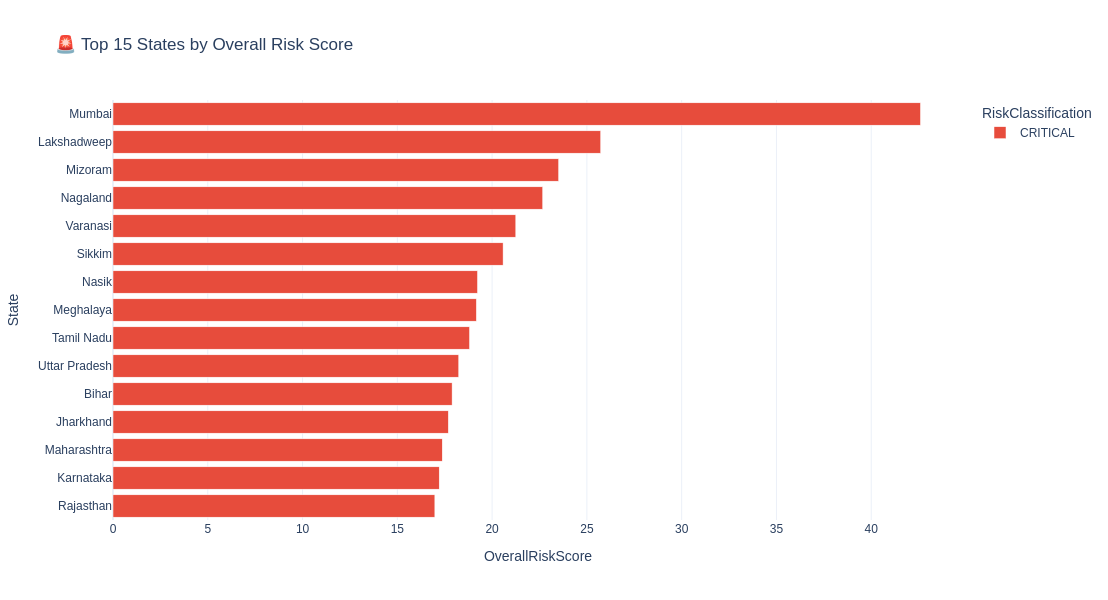

In [13]:
# Visualize bottlenecks
top15 = critical.head(15)

fig = px.bar(top15, x='OverallRiskScore', y='State', orientation='h',
             color='RiskClassification', 
             color_discrete_map={'CRITICAL': '#e74c3c', 'HIGH': '#f39c12', 'MODERATE': '#3498db'},
             title='🚨 Top 15 States by Overall Risk Score')
fig.update_layout(template='plotly_white', height=600, yaxis={'categoryorder':'total ascending'})
fig.show()

## 5. Day vs Night Analysis

In [14]:
# Day vs Night comparison
day_night = pattern_analyzer.get_day_vs_night_comparison()
day_night = day_night[~day_night['State'].str.contains('Total', case=False, na=False)]
print('🌙 DAY VS NIGHT COMPARISON')
print('='*60)
day_night.head(15)

🌙 DAY VS NIGHT COMPARISON


Period,State,Day,Night,DayNightRatio,Total,DayPercentage
75,Tamil Nadu,38657,28556,1.35,67213,57.51
50,Madhya Pradesh,31388,23375,1.34,54763,57.32
40,Kerala,29693,16288,1.82,45981,64.58
39,Karnataka,24164,19275,1.25,43439,55.63
85,Uttar Pradesh,18426,19338,0.95,37764,48.79
52,Maharashtra,16797,14550,1.15,31347,53.58
69,Rajasthan,14819,10042,1.48,24861,59.61
76,Telangana,12694,10209,1.24,22903,55.43
4,Andhra Pradesh,11421,8528,1.34,19949,57.25
25,Gujarat,9216,7133,1.29,16349,56.37


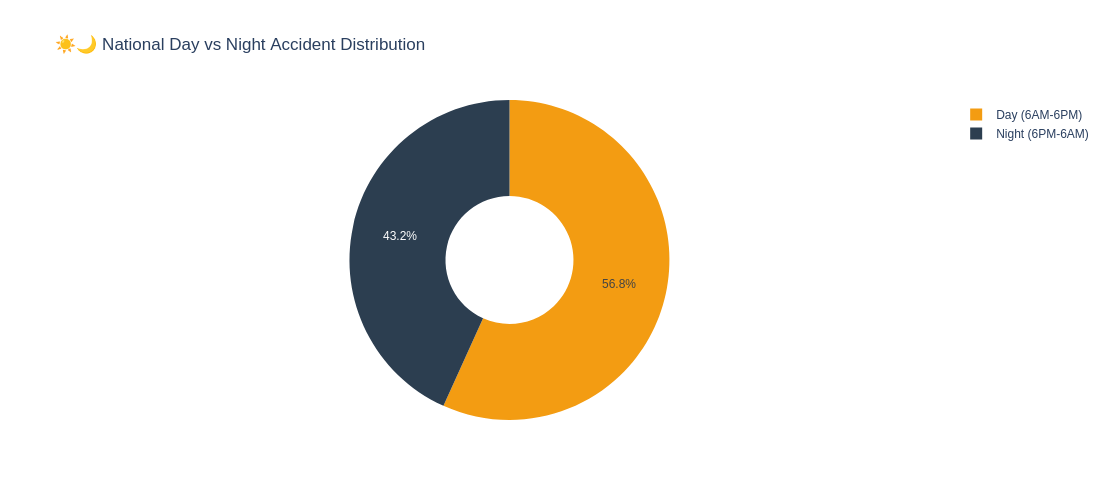

In [15]:
# National day vs night
national_day = day_night['Day'].sum()
national_night = day_night['Night'].sum()

fig = go.Figure(data=[go.Pie(
    labels=['Day (6AM-6PM)', 'Night (6PM-6AM)'],
    values=[national_day, national_night],
    hole=0.4,
    marker_colors=['#f39c12', '#2c3e50']
)])

fig.update_layout(
    title='☀️🌙 National Day vs Night Accident Distribution',
    template='plotly_white',
    height=500
)
fig.show()

In [16]:
# Pattern Summary
summary = pattern_analyzer.generate_pattern_summary()
print('📋 PATTERN SUMMARY')
print('='*60)
for key, value in summary.items():
    print(f'{key}: {value}')

📋 PATTERN SUMMARY
peak_time_slots: ['18:00-21:00']
safest_time_slots: ['03:00-06:00', '00:00-03:00']
high_accident_months: []
low_accident_months: []
top_5_states: ['Total (All India)', 'Total (States)', 'Total (Cities)', 'Tamil Nadu', 'Madhya Pradesh']
national_day_percentage: 55.66
total_accidents_analyzed: 1531907


## 📝 Key Insights

### Peak Hours
- **Highest Risk**: 18:00-21:00 (evening rush hour)
- **Lowest Risk**: 00:00-06:00 (early morning)
- Day accidents are ~57% of total

### Critical Bottlenecks
- States like Tamil Nadu, UP, Maharashtra have highest risk scores
- Combination of high volume + high severity = critical bottleneck

### Recommendations
1. Focus traffic management during 18:00-21:00 hours
2. Targeted interventions in critical bottleneck states
3. Night-time visibility improvements needed

---
*Continue to Notebook 03 for Predictive Models*